In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
import joblib
import os

In [ ]:
defense_rec = pd.read_csv('/Users/blairjdaniel/lighthouse/lighthouse/NHL/NHL_points_projection/files/master_copies/defense_rec.csv')
defense_salary = pd.read_csv('/Users/blairjdaniel/lighthouse/lighthouse/NHL/NHL_points_projection/files/salary/cap_all.csv')

In [5]:
# Define the bins and corresponding salary values
bins = [0.0, 0.01, 0.03, 0.05, 0.1, 0.2, 0.3, float('inf')]
labels = [950000, 2000000, 4000000, 6000000, 8000000, 10000000, 12000000]

# Use pd.cut to bin the values and map them to the salary values
defense_rec['salary'] = pd.cut(defense_rec['goals'], bins=bins, labels=labels, right=False)

# Display the first few rows of the updated DataFrame
defense_rec.to_csv('/Users/blairjdaniel/lighthouse/lighthouse/NHL/files/master_copies/forwards_rec_two.csv')

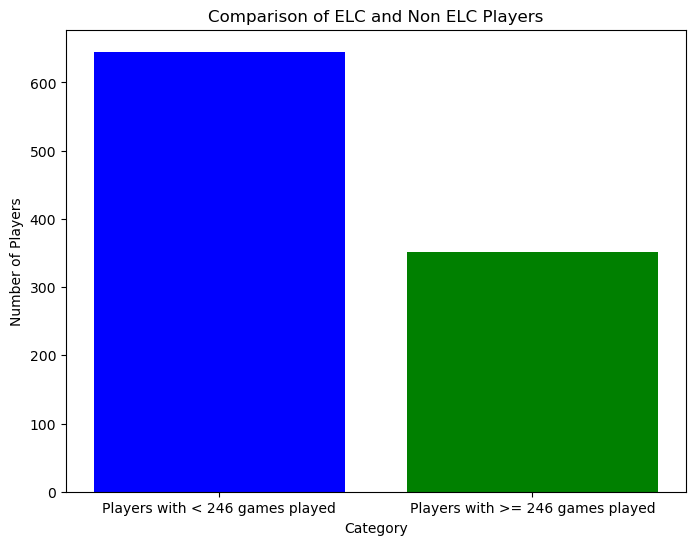

In [6]:
# Filter the DataFrame to count the number of players with fewer than 246 (elc) games played
games_played_threshold = 246
players_under_threshold = defense_rec[defense_rec['games_played'] < games_played_threshold]

# Count the number of players under the threshold
count_under_threshold = players_under_threshold.shape[0]

# Filter the df to count the number of players with over 246 (non elc)
players_over_threshold = defense_rec[defense_rec['games_played'] >= games_played_threshold]
count_over_threshold = players_over_threshold.shape[0]

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(['Players with < 246 games played', 'Players with >= 246 games played'], [count_under_threshold, count_over_threshold], color=['blue', 'green'])
plt.xlabel('Category')
plt.ylabel('Number of Players')
plt.title('Comparison of ELC and Non ELC Players')
plt.show()

In [ ]:
over_8000000 = defense_rec[defense_rec['games_played'] < 246]
over_8000000

In [ ]:
# Define the over_8000000 DataFrame based on the criteria
over_8000000 = defense_rec[defense_rec['games_played'] < 246]

# Change the salary of all players in the over_8000000 DataFrame to $950,000 in the defense_rec DataFrame
defense_rec.loc[over_8000000.index, 'salary'] = 950000
defense_rec= defense_rec.drop(columns=['Unnamed: 0'])

In [ ]:
defense_rec

In [ ]:
defense_rec.to_csv('/Users/blairjdaniel/lighthouse/lighthouse/NHL/files/master_copies/defense_rec_two.csv')